In [ ]:
!pip install folktables --quiet
!pip install interpret --quiet
!pip install lightgbm --quiet
!pip install shap --quiet
!pip install lime --quiet
!pip install scikit-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd

# Generate resume data

In [ ]:
city_names = pd.read_csv('/content/cities.csv')["City"].tolist()
print(city_names)
universities_df = pd.read_csv('/content/world_universities.csv')
us_universities_df = universities_df.loc[(universities_df['code'] == 'US') & (~universities_df[' name'].str.contains(','))]

us_uni = us_universities_df[' name'].tolist()
print(us_uni)
world_universities_df = universities_df.loc[(universities_df['code'] != 'US') & (~universities_df[' name'].str.contains(','))]
world_uni = world_universities_df[' name'].tolist()
print(world_uni)
role_names = pd.read_csv('/content/jobs.csv')["Job Role"].tolist()
print(role_names)

['Gilbert', 'El Paso', 'Chesapeake', 'Omaha', 'Jersey City', 'Winston–Salem', 'Long Beach', 'Anchorage', 'Reno', 'Las Vegas', 'New York', 'Jacksonville', 'Winston–Salem', 'Colorado Springs', 'Chicago', 'Laredo', 'Anaheim', 'Minneapolis', 'Gilbert', 'Saint Paul', 'Honolulu', 'Nashville', 'St. Petersburg', 'Miami', 'Philadelphia', 'St. Louis', 'Baltimore', 'Fort Worth', 'Tucson', 'Atlanta', 'Denver', 'North Las Vegas', 'Houston', 'Newark', 'Jacksonville', 'Norfolk', 'Aurora', 'Buffalo', 'Lexington', 'Tampa', 'Boise', 'Chesapeake', 'Seattle', 'Arlington', 'Columbus', 'Chandler', 'Jersey City', 'Louisville', 'Arlington', 'San Jose', 'Mesa', 'Long Beach', 'Houston', 'Colorado Springs', 'Sacramento', 'Fort Worth', 'Colorado Springs', 'Henderson', 'Bakersfield', 'Colorado Springs', 'Chula Vista', 'Cleveland', 'Pittsburgh', 'New York', 'Pittsburgh', 'Gilbert', 'San Diego', 'Chandler', 'Garland', 'Jersey City', 'Sacramento', 'Mesa', 'Lubbock', 'Indianapolis', 'Las Vegas', 'Durham', 'Lexington',

In [ ]:
def remove_quotes(name):
    if name[0] == '\"':
        return name[1:-1]
    return name

In [ ]:
universities = np.concatenate((us_uni, np.random.choice(world_uni, 100)))
universities = np.apply_along_axis(remove_quotes, 0, universities)
cities = city_names
roles = role_names
degrees = ["Bachelors", "Masters", "Phd"]
genders = ["M", "F", "N/A"]
veteran_statuses = [0, 1, "N/A"]
disability = [0, 1, "N/A"]
ethnicities = list(range(5))
num_exps = [1, 2, 3]

In [ ]:
seed = 42
def generate_data(num_samples=100):
    np.random.seed(seed)

    data = {
        "Applicant ID": np.arange(1, num_samples + 1),
        "School Name": np.random.choice(universities, num_samples),
        "GPA": np.round(np.random.uniform(2.0, 4.0, num_samples), 2),
        "Degree": np.random.choice(degrees, num_samples),
        "Location": np.random.choice(cities, num_samples),
        "Gender": np.random.choice(genders, num_samples),
        "Veteran status": np.random.choice(veteran_statuses, num_samples),
        "Work authorization": np.random.randint(0, 2, num_samples),
        "Disability": np.random.choice(disability, num_samples),
        "Ethnicity": np.random.choice(ethnicities, num_samples),
        "Num Experiences": np.random.choice(num_exps, num_samples),
        "Role 1": np.full((num_samples,), "N/A"),
        "Start 1": np.full((num_samples,), "N/A"),
        "End 1": np.full((num_samples,), "N/A"),
        "Role 2": np.full((num_samples,), "N/A"),
        "Start 2": np.full((num_samples,), "N/A"),
        "End 2": np.full((num_samples,), "N/A"),
        "Role 3": np.full((num_samples,), "N/A"),
        "Start 3": np.full((num_samples,), "N/A"),
        "End 3": np.full((num_samples,), "N/A"),
    }

    return pd.DataFrame(data)

from tqdm.notebook import tqdm
def fulfill_roles(data):
    np.random.seed(seed)
    for idx, row in tqdm(data.iterrows()):
        num_exp = row['Num Experiences']
        curr_date_range_start = pd.Timestamp('2014-01-01')
        curr_date_range_end = pd.Timestamp('2022-01-01')
        for i in range(num_exp):
          # Role
          data.loc[idx, f'Role {i+1}'] = np.random.choice(roles, 1)
          # Start
          dates = pd.date_range(start=curr_date_range_start, end=curr_date_range_end)
          start = np.random.choice(dates)
          data.loc[idx, f'Start {i+1}'] = pd.Timestamp(start).strftime('%m/%y')
          # End
          end = start + pd.to_timedelta(np.random.randint(60, 740, 1), unit="D")
          data.loc[idx, f'End {i+1}'] = end.strftime('%m/%y')
          curr_date_range_end = start

    return data

# Generate the adjusted data
n_samples = 4000
resumes = generate_data(num_samples=n_samples)
resumes = fulfill_roles(resumes)
resumes.head()


0it [00:00, ?it/s]

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Num Experiences,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,1,Marine Biologist,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,1,Cybersecurity Analyst,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,3,Marine Biologist,12/19,05/21,Real Estate Agent,11/14,04/16,Industrial Designer,04/14,04/16
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,2,Software Developer,08/18,08/19,Financial Analyst,12/14,06/16,N/A,N/A,N/A
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,1,Forensic Accountant,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A


In [ ]:
resumes = resumes.drop(columns=['Num Experiences'])
resumes.to_csv(f'1_{n_samples}_resumes.csv', index=False)

# Combine raw resume with scores

In [ ]:
scorer_result = pd.read_csv(f'/content/1_{n_samples}_scorer.csv')
resumes_scored = pd.concat([resumes, scorer_result["score"].rename("Resume score")], axis=1)
resumes_scored.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,Marine Biologist,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A,1.49
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,Cybersecurity Analyst,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A,4.92
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,Marine Biologist,12/19,05/21,Real Estate Agent,11/14,04/16,Industrial Designer,04/14,04/16,6.36
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,Software Developer,08/18,08/19,Financial Analyst,12/14,06/16,N/A,N/A,N/A,9.31
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,Forensic Accountant,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A,7.61


In [ ]:
resumes_scored.to_csv(f'1_{n_samples}_resumes_scored.csv', index=False)

In [ ]:
evaluator_result = pd.read_csv(f'/content/1_{n_samples}_evaluator.csv')
resume_scored_evaluated = pd.concat([resumes_scored, evaluator_result["prediction"]], axis=1)
resume_scored_evaluated

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score,prediction
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,...,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A,1.49,0
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,...,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A,4.92,1
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,...,12/19,05/21,Real Estate Agent,11/14,04/16,Industrial Designer,04/14,04/16,6.36,0
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,...,08/18,08/19,Financial Analyst,12/14,06/16,N/A,N/A,N/A,9.31,0
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,...,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A,7.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,University of Arkansas for Medical Sciences,3.29,Masters,Newark,N/A,0,0,N/A,2,...,03/19,02/21,Biomedical Engineer,12/17,03/18,Urban Planner,03/15,12/16,9.86,0
3996,3997,Marian College of Fond Du Lac,3.53,Phd,Tulsa,M,1,0,N/A,0,...,11/19,10/20,N/A,N/A,N/A,N/A,N/A,N/A,9.04,0
3997,3998,Washington Bible College,3.17,Phd,Jersey City,F,N/A,1,N/A,3,...,05/15,03/17,Social Media Coordinator,12/14,10/15,N/A,N/A,N/A,6.24,1
3998,3999,Sam Houston State University,2.53,Bachelors,Reno,N/A,0,0,N/A,4,...,07/21,04/22,Human Resources Specialist,01/16,10/17,N/A,N/A,N/A,2.44,0


In [ ]:
resume_scored_evaluated.to_csv(f'/content/1_{n_samples}_resumes_evaluated.csv')

# Analysis

In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Test 1: The effect of categorical demographic variables on the score and prediction (dataset 1)

### gender

In [ ]:
resume_scored_evaluated = pd.read_csv(f'/content/1_{n_samples}_resumes_evaluated.csv')

Selection Rates by Gender:
Gender
F      0.218289
M      0.334096
N/A    0.000000
Name: prediction, dtype: float64


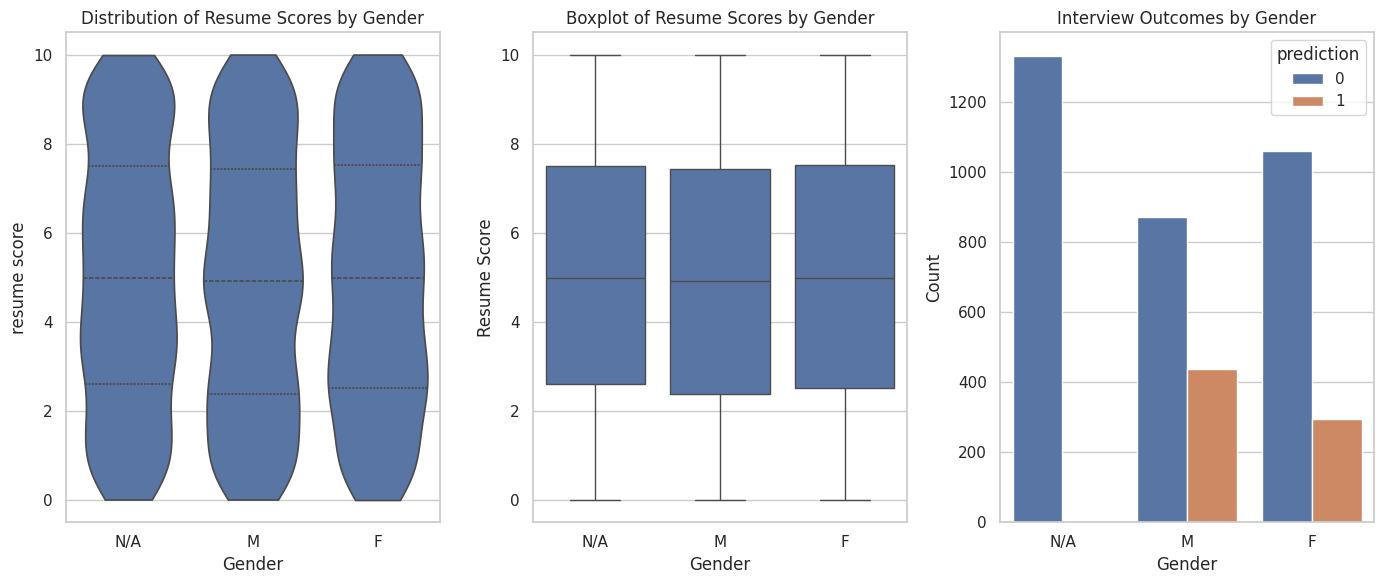

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Selection rates for interviews by Gender
selection_rate_gender = resume_scored_evaluated.groupby('Gender')['prediction'].mean()
print("Selection Rates by Gender:")
print(selection_rate_gender)

# 2. Graphs: distribution of resume scores

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_scored_evaluated, x='Gender', y='Resume score', ax=ax[0], inner='quartile', cut=0)
ax[0].set_title('Distribution of Resume Scores by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('resume score')

# Box Plot of Resume scores by Gender
sns.boxplot(x='Gender', y='Resume score', data=resume_scored_evaluated, ax=ax[1])
ax[1].set_title('Boxplot of Resume Scores by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Resume Score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_scored_evaluated, x='Gender', hue='prediction', ax=ax[2])
ax[2].set_title('Interview Outcomes by Gender')
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Logistic Regression to see effect of gender and resume score on the final prediction
gender_filtered = resume_scored_evaluated[resume_scored_evaluated['Gender'].isin(['M', 'F'])]
gender_filtered['Gender'] = gender_filtered['Gender'].astype('category')

formula = 'prediction ~ Q("Resume score") * C(Gender)'

model = smf.logit(formula=formula, data=gender_filtered).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.579649
         Iterations 5


<ipython-input-34-b54433d77f7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_filtered['Gender'] = gender_filtered['Gender'].astype('category')


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2663
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 May 2024   Pseudo R-squ.:                 0.01483
Time:                        14:22:01   Log-Likelihood:                -1545.9
converged:                       True   LL-Null:                       -1569.2
Covariance Type:            nonrobust   LLR p-value:                 4.317e-10
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.3588      0.133    -10.244      0.000      -1.619      -1.099
C(Gender)[T.M]                       0.5678      0.177      3.216      0.001       0.222       0.914
Q("Resume score")                    0.0165      0.023      0.727      0.467      -0.028       0.061
Q("Resume score"):C(Gender)[T.M]     0.0039      0.030      0.127      0.899      -0.056       0.063
====================================================================================================
"""

### Ethnicity

Selection Rates by Ethnicity:
Ethnicity
0    0.177215
1    0.171352
2    0.188514
3    0.198198
4    0.181921
Name: prediction, dtype: float64


<ipython-input-35-ee0e06ba0d30>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_scored_evaluated, x='Ethnicity', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


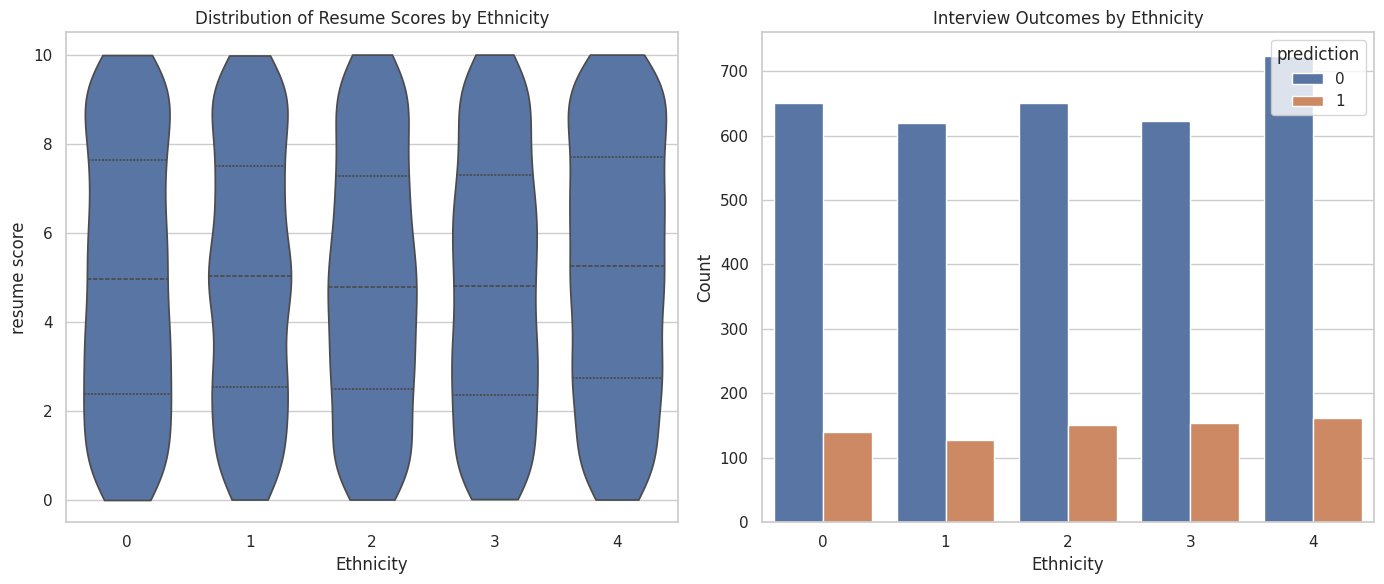

In [ ]:
# 1. Selection rates for interviews by ethnicity
selection_rate_eth = resume_scored_evaluated.groupby('Ethnicity')['prediction'].mean()
print("Selection Rates by Ethnicity:")
print(selection_rate_eth)

# 2. distribution graphs

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by ethnicity
sns.violinplot(data=resume_scored_evaluated, x='Ethnicity', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Ethnicity')
ax[0].set_xlabel('Ethnicity')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by ethnicity
sns.countplot(data=resume_scored_evaluated, x='Ethnicity', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Ethnicity')
ax[1].set_xlabel('Ethnicity')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Logistic Regression to see effect of ethnicity and resume score on the final predictionresume_scored_evaluated['Ethnicity'] = resume_scored_evaluated['Ethnicity'].astype('category')

formula = 'prediction ~ Q("Resume score") * C(Ethnicity)'
model = smf.logit(formula=formula, data=resume_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.476224
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3990
Method:                           MLE   Df Model:                            9
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0009129
Time:                        14:22:11   Log-Likelihood:                -1904.9
converged:                       True   LL-Null:                       -1906.6
Covariance Type:            nonrobust   LLR p-value:                    0.9421
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.6340      0.185     -8.850      0.000      -1.996      -1.272
C(Ethnicity)[T.1]                      -0.0581      0.272     -0.214      0.831      -0.591       0.475
C(Ethnicity)[T.2]                       0.1475      0.257      0.575      0.565      -0.355       0.650
C(Ethnicity)[T.3]                       0.2407      0.255      0.944      0.345      -0.259       0.741
C(Ethnicity)[T.4]                       0.0307      0.259      0.119      0.906      -0.478       0.539
Q("Resume score")                       0.0196      0.031      0.626      0.531      -0.042       0.081
Q("Resume score"):C(Ethnicity)[T.1]     0.0031      0.046      0.068      0.946      -0.087       0.093
Q("Resume score"):C(Ethnicity)[T.2]    -0.0141      0.044     -0.318      0.750      -0.101       0.073
Q("Resume score"):C(Ethnicity)[T.3]    -0.0205      0.044     -0.463      0.644      -0.107       0.066
Q("Resume score"):C(Ethnicity)[T.4]    -0.0006      0.043     -0.014      0.989      -0.086       0.085
=======================================================================================================
"""

### Work Authorization

Selection Rates by work authorization:
Work authorization
0    0.176142
1    0.190640
Name: prediction, dtype: float64


<ipython-input-25-b3dab5228deb>:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_scored_evaluated, x='Work authorization', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


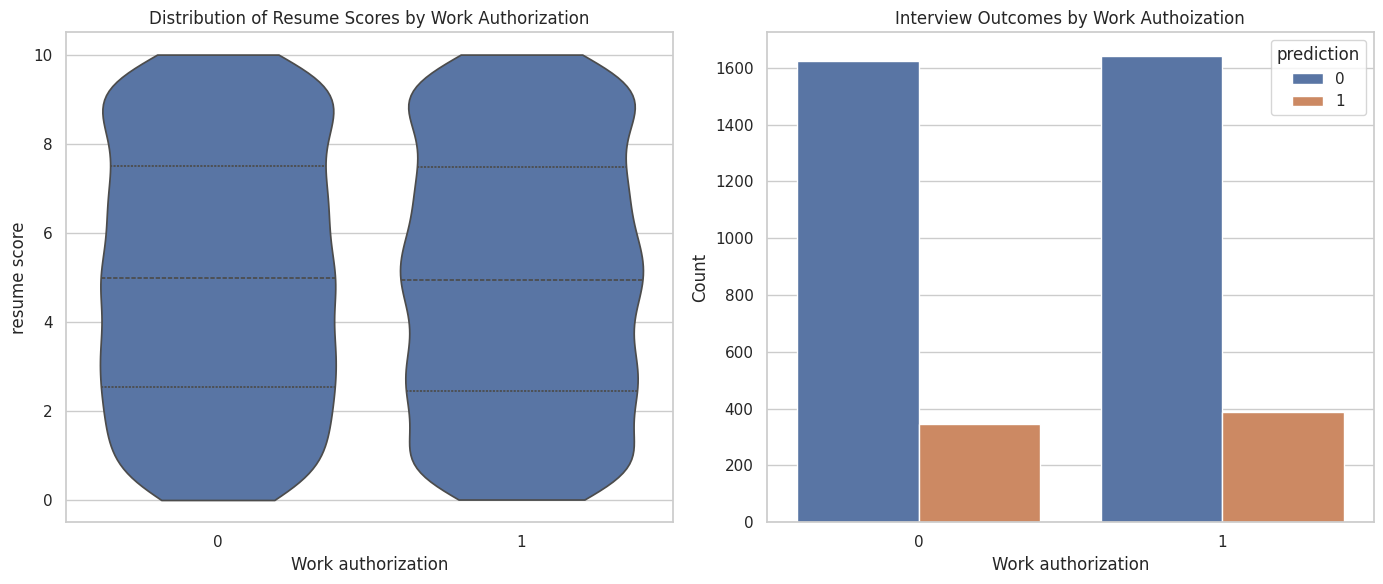

In [ ]:
# 1. Selection rates for interviews by work authorization
selection_rate_auth = resume_scored_evaluated.groupby('Work authorization')['prediction'].mean()
print("Selection Rates by work authorization:")
print(selection_rate_auth)

# 2. Distribution graphs
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_scored_evaluated, x='Work authorization', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Work Authorization')
ax[0].set_xlabel('Work authorization')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_scored_evaluated, x='Work authorization', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Work Authoization')
ax[1].set_xlabel('Work authorization')
ax[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# 3. Logistic Regression to see effect of work authorization and resume score on the final prediction
resume_scored_evaluated['auth_cat'] = resume_scored_evaluated['Work authorization'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(auth_cat)'

model = smf.logit(formula=formula, data=resume_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.476266
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0008256
Time:                        14:18:44   Log-Likelihood:                -1905.1
converged:                       True   LL-Null:                       -1906.6
Covariance Type:            nonrobust   LLR p-value:                    0.3693
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.6802      0.121    -13.870      0.000      -1.918      -1.443
C(auth_cat)[T.1]                       0.2365      0.165      1.436      0.151      -0.086       0.559
Q("Resume score")                      0.0270      0.020      1.320      0.187      -0.013       0.067
Q("Resume score"):C(auth_cat)[T.1]    -0.0274      0.028     -0.973      0.331      -0.083       0.028
======================================================================================================
"""

### Disability

Selection Rates by disability:
Disability
0      0.171012
1      0.172546
N/A    0.205460
Name: prediction, dtype: float64


<ipython-input-37-ce045637f5c4>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_scored_evaluated, x='Disability', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


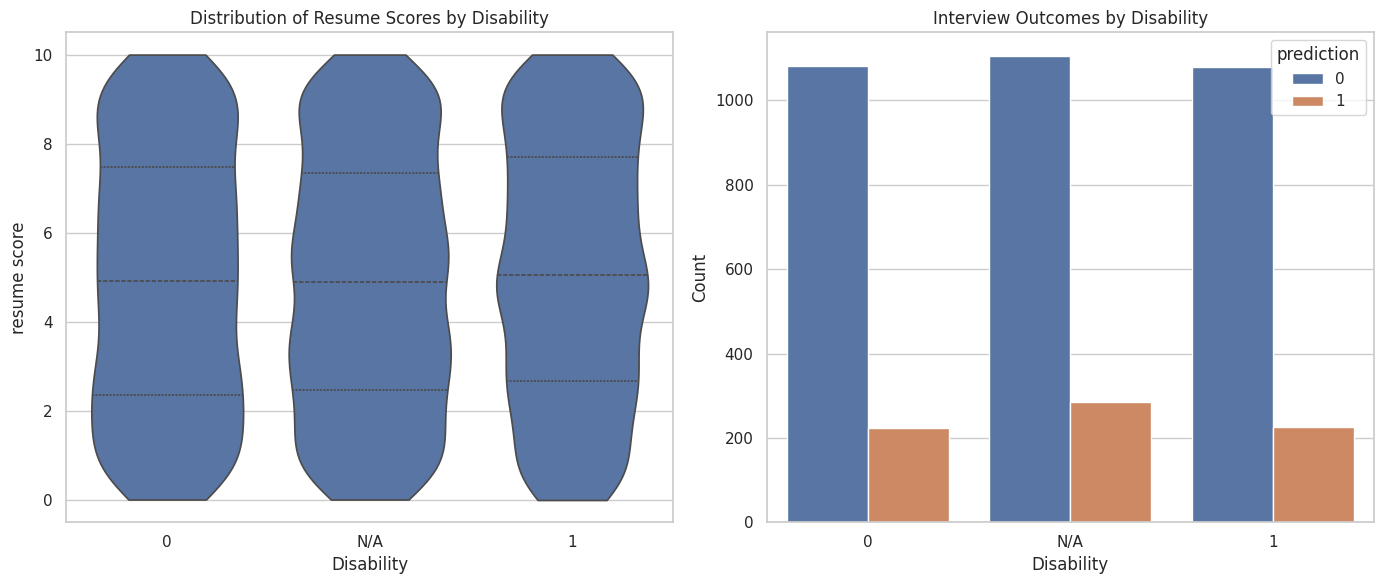

In [ ]:
# 1. Selection rates for interviews by disability status
selection_rate_dis = resume_scored_evaluated.groupby('Disability')['prediction'].mean()
print("Selection Rates by disability:")
print(selection_rate_dis)

# 2. distribution graphs

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_scored_evaluated, x='Disability', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Disability')
ax[0].set_xlabel('Disability')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_scored_evaluated, x='Disability', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Disability')
ax[1].set_xlabel('Disability')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Logistic Regression to see effect of disability and resume score on the final prediction
formula = 'prediction ~ Q("Resume score") * C(Disability)'
model = smf.logit(formula=formula, data=resume_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.475575
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 May 2024   Pseudo R-squ.:                0.002275
Time:                        14:22:24   Log-Likelihood:                -1902.3
converged:                       True   LL-Null:                       -1906.6
Covariance Type:            nonrobust   LLR p-value:                    0.1228
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.5718      0.144    -10.931      0.000      -1.854      -1.290
C(Disability)[T.1]                        -0.1695      0.210     -0.807      0.420      -0.581       0.242
C(Disability)[T.N/A]                       0.1757      0.195      0.899      0.369      -0.207       0.559
Q("Resume score")                         -0.0013      0.025     -0.054      0.957      -0.050       0.048
Q("Resume score"):C(Disability)[T.1]       0.0346      0.036      0.972      0.331      -0.035       0.104
Q("Resume score"):C(Disability)[T.N/A]     0.0102      0.034      0.299      0.765      -0.057       0.077
==========================================================================================================
"""

### Veteran Status

Selection Rates by veteran status:
Veteran status
0      0.179641
1      0.173978
N/A    0.197119
Name: prediction, dtype: float64


<ipython-input-39-480e1957f159>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_scored_evaluated, x='Veteran status', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


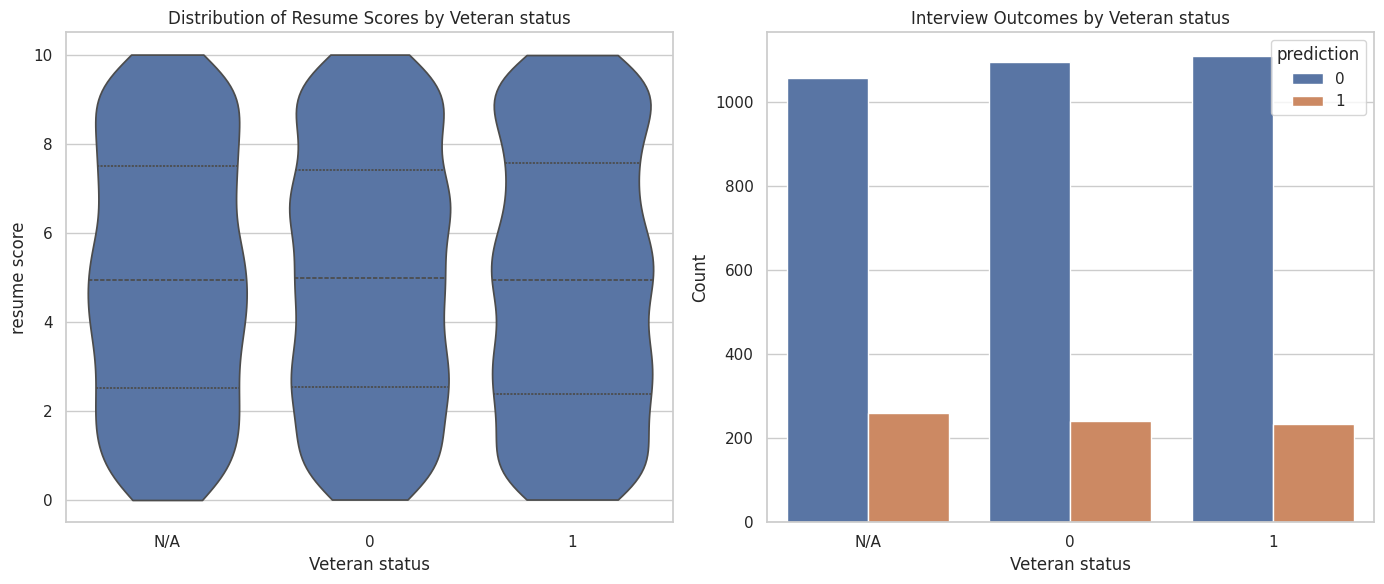

In [ ]:
# 1. Selection rates for interviews by disability status
selection_rate_vet = resume_scored_evaluated.groupby('Veteran status')['prediction'].mean()
print("Selection Rates by veteran status:")
print(selection_rate_vet)

# 2. distribution graphs

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_scored_evaluated, x='Veteran status', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Veteran status')
ax[0].set_xlabel('Veteran status')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_scored_evaluated, x='Veteran status', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Veteran status')
ax[1].set_xlabel('Veteran status')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Logistic Regression to see effect of Veteran Status and resume score on the final prediction
resume_scored_evaluated['veteran_cat'] = resume_scored_evaluated['Veteran status'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(veteran_cat)'
model = smf.logit(formula=formula, data=resume_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.476226
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0009086
Time:                        14:22:36   Log-Likelihood:                -1904.9
converged:                       True   LL-Null:                       -1906.6
Covariance Type:            nonrobust   LLR p-value:                    0.6287
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.5999      0.145    -11.042      0.000      -1.884      -1.316
C(veteran_cat)[T.1]                        -0.0383      0.203     -0.189      0.850      -0.436       0.359
C(veteran_cat)[T.N/A]                       0.1710      0.201      0.849      0.396      -0.224       0.566
Q("Resume score")                           0.0160      0.025      0.648      0.517      -0.032       0.064
Q("Resume score"):C(veteran_cat)[T.1]    9.528e-05      0.035      0.003      0.998      -0.068       0.068
Q("Resume score"):C(veteran_cat)[T.N/A]    -0.0111      0.035     -0.322      0.747      -0.079       0.057
===========================================================================================================
"""

##Test 2: Controlling College Name, Location, and Experience number & name (dataset 2), find the effect of demographics variables on the score and decision

In [ ]:
resumes_control = resumes.copy()
resumes_control['School Name'] = "Providence College"
resumes_control['Location'] = 'Providence'
resumes_control['Role 1'] = 'Data Scientist'
resumes_control['Role 2'] = 'N/A'
resumes_control['Start 2'] = 'N/A'
resumes_control['End 2'] = 'N/A'
resumes_control['Role 3'] = 'N/A'
resumes_control['Start 3'] = 'N/A'
resumes_control['End 3'] = 'N/A'
resumes_control.to_csv(f'2_{n_samples}_resumes.csv', index=False)

In [ ]:
scorer_result_2 = pd.read_csv(f'/content/2_{n_samples}_scorer.csv')
resumes_2_scored = pd.concat([resumes_control, scorer_result_2["score"].rename("Resume score")], axis=1)
resumes_2_scored.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score
0,1,Providence College,2.09,Masters,Providence,N/A,N/A,1,0,4,Data Scientist,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A,7.66
1,2,Providence College,3.24,Phd,Providence,M,0,1,N/A,2,Data Scientist,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A,6.76
2,3,Providence College,3.12,Bachelors,Providence,F,1,1,1,0,Data Scientist,12/19,05/21,N/A,N/A,N/A,N/A,N/A,N/A,8.55
3,4,Providence College,2.69,Phd,Providence,N/A,0,0,1,4,Data Scientist,08/18,08/19,N/A,N/A,N/A,N/A,N/A,N/A,4.71
4,5,Providence College,2.63,Bachelors,Providence,F,N/A,0,N/A,1,Data Scientist,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A,2.83


In [ ]:
resumes_2_scored.to_csv(f'2_{n_samples}_resumes_scored.csv', index=False)

In [ ]:
evaluator_result_2 = pd.read_csv(f'/content/2_{n_samples}_evaluator.csv')
resume_2_scored_evaluated = pd.concat([resumes_2_scored, evaluator_result_2["prediction"]], axis=1)
resume_2_scored_evaluated

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score,prediction
0,1,Providence College,2.09,Masters,Providence,N/A,N/A,1,0,4,...,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A,7.66,0
1,2,Providence College,3.24,Phd,Providence,M,0,1,N/A,2,...,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A,6.76,1
2,3,Providence College,3.12,Bachelors,Providence,F,1,1,1,0,...,12/19,05/21,N/A,N/A,N/A,N/A,N/A,N/A,8.55,0
3,4,Providence College,2.69,Phd,Providence,N/A,0,0,1,4,...,08/18,08/19,N/A,N/A,N/A,N/A,N/A,N/A,4.71,0
4,5,Providence College,2.63,Bachelors,Providence,F,N/A,0,N/A,1,...,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A,2.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Providence College,3.29,Masters,Providence,N/A,0,0,N/A,2,...,03/19,02/21,N/A,N/A,N/A,N/A,N/A,N/A,7.55,0
3996,3997,Providence College,3.53,Phd,Providence,M,1,0,N/A,0,...,11/19,10/20,N/A,N/A,N/A,N/A,N/A,N/A,1.71,0
3997,3998,Providence College,3.17,Phd,Providence,F,N/A,1,N/A,3,...,05/15,03/17,N/A,N/A,N/A,N/A,N/A,N/A,1.46,0
3998,3999,Providence College,2.53,Bachelors,Providence,N/A,0,0,N/A,4,...,07/21,04/22,N/A,N/A,N/A,N/A,N/A,N/A,5.82,0


In [ ]:
resume_2_scored_evaluated.to_csv(f'2_{n_samples}_resumes_evaluated.csv', index=False)

### Gender

Selection Rates by Gender:
Gender
F      0.370206
M      0.620137
N/A    0.000000
Name: prediction, dtype: float64


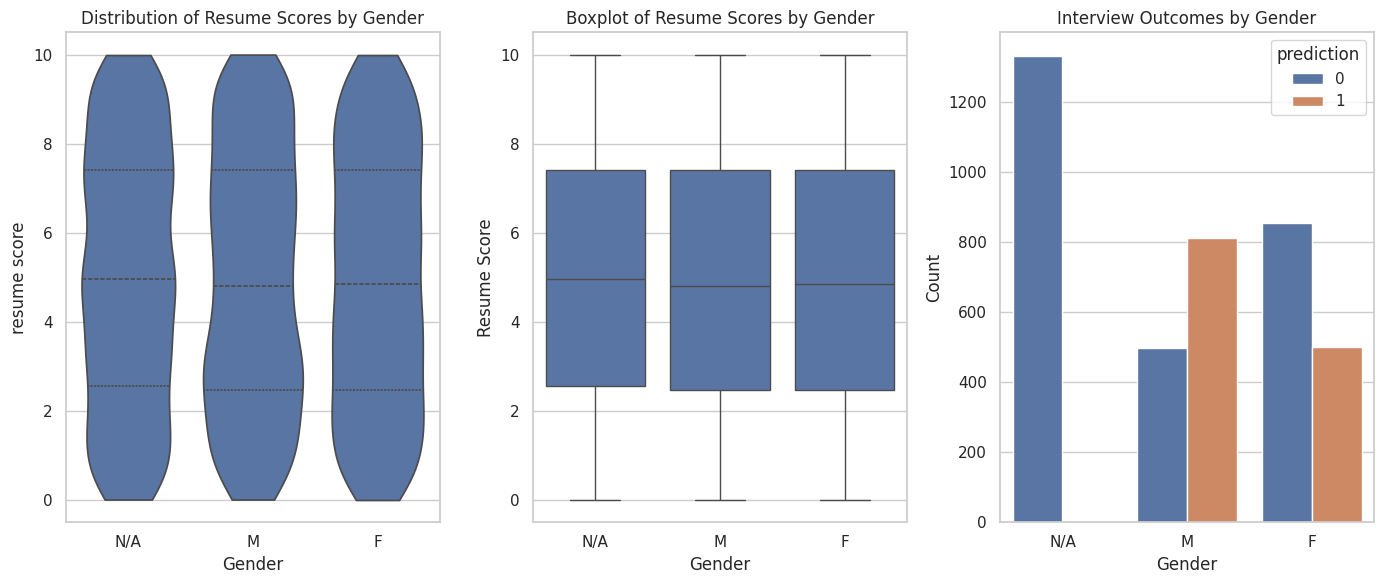

In [ ]:
# 1. Selection rates for interviews by Gender
selection_rate_gender = resume_2_scored_evaluated.groupby('Gender')['prediction'].mean()
print("Selection Rates by Gender:")
print(selection_rate_gender)

# 2. Graphs: distribution of resume scores and predictions by gender
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_2_scored_evaluated, x='Gender', y='Resume score', ax=ax[0], inner='quartile', cut=0)
ax[0].set_title('Distribution of Resume Scores by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('resume score')

# Box Plot of Resume scores by Gender
sns.boxplot(x='Gender', y='Resume score', data=resume_2_scored_evaluated, ax=ax[1])
ax[1].set_title('Boxplot of Resume Scores by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Resume Score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_2_scored_evaluated, x='Gender', hue='prediction', ax=ax[2])
ax[2].set_title('Interview Outcomes by Gender')
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Logistic Regression to see effect of gender and resume score on the final prediction
gender_filtered = resume_2_scored_evaluated[resume_2_scored_evaluated['Gender'].isin(['M', 'F'])]
gender_filtered['Gender'] = gender_filtered['Gender'].astype('category')

formula = 'prediction ~ Q("Resume score") * C(Gender)'

model = smf.logit(formula=formula, data=gender_filtered).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.661319
         Iterations 4


<ipython-input-47-0adee7c90c73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_filtered['Gender'] = gender_filtered['Gender'].astype('category')


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 2667
Model:                          Logit   Df Residuals:                     2663
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 May 2024   Pseudo R-squ.:                 0.04579
Time:                        14:24:18   Log-Likelihood:                -1763.7
converged:                       True   LL-Null:                       -1848.4
Covariance Type:            nonrobust   LLR p-value:                 1.842e-36
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.6230      0.113     -5.531      0.000      -0.844      -0.402
C(Gender)[T.M]                       1.1001      0.159      6.921      0.000       0.789       1.412
Q("Resume score")                    0.0186      0.020      0.943      0.346      -0.020       0.057
Q("Resume score"):C(Gender)[T.M]    -0.0159      0.028     -0.572      0.567      -0.070       0.039
====================================================================================================
"""

###Ethnicity

Selection Rates by Ethnicity:
Ethnicity
0    0.300000
1    0.303882
2    0.333333
3    0.351351
4    0.351412
Name: prediction, dtype: float64


<ipython-input-48-b1ac197348d6>:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_2_scored_evaluated, x='Ethnicity', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


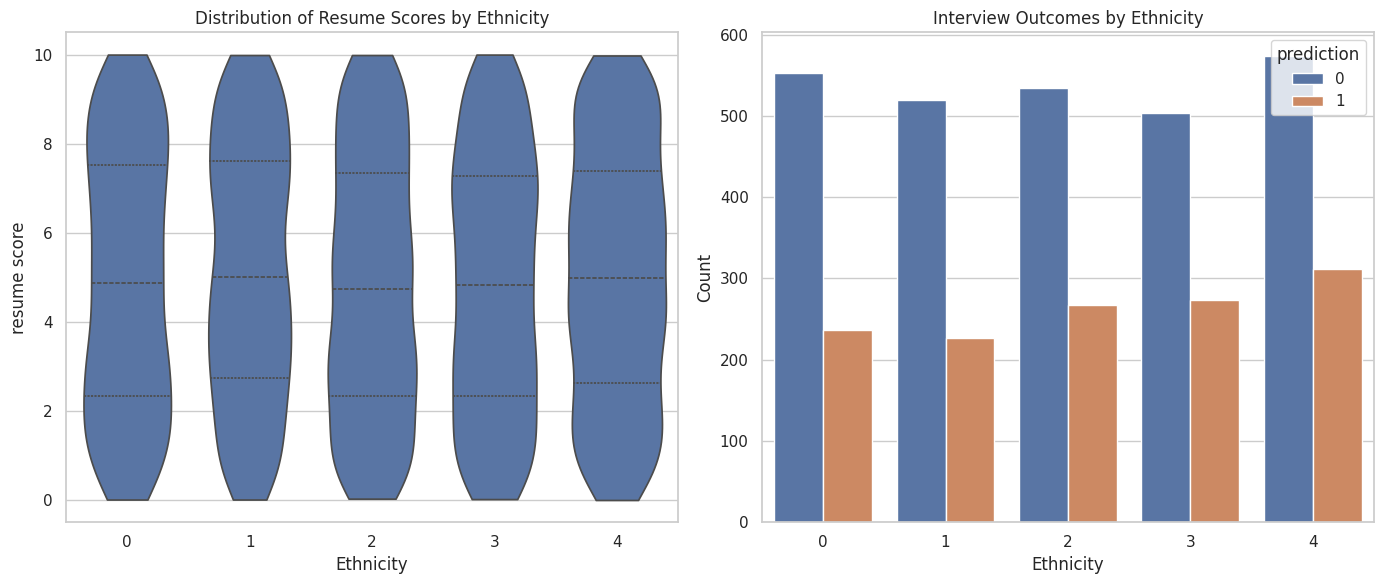

In [ ]:
# 1. Selection rates for interviews by ethnicity
selection_rate_eth = resume_2_scored_evaluated.groupby('Ethnicity')['prediction'].mean()
print("Selection Rates by Ethnicity:")
print(selection_rate_eth)

# 2. distribution graphs
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_2_scored_evaluated, x='Ethnicity', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Ethnicity')
ax[0].set_xlabel('Ethnicity')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_2_scored_evaluated, x='Ethnicity', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Ethnicity')
ax[1].set_xlabel('Ethnicity')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
resume_2_scored_evaluated['Ethnicity'] = resume_2_scored_evaluated['Ethnicity'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(Ethnicity)'
model = smf.logit(formula=formula, data=resume_2_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.631832
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3990
Method:                           MLE   Df Model:                            9
Date:                Wed, 08 May 2024   Pseudo R-squ.:                0.002302
Time:                        14:24:32   Log-Likelihood:                -2527.3
converged:                       True   LL-Null:                       -2533.2
Covariance Type:            nonrobust   LLR p-value:                    0.2329
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.8550      0.152     -5.620      0.000      -1.153      -0.557
C(Ethnicity)[T.1]                       0.1371      0.222      0.618      0.536      -0.298       0.572
C(Ethnicity)[T.2]                       0.0350      0.211      0.166      0.868      -0.379       0.449
C(Ethnicity)[T.3]                       0.1258      0.213      0.591      0.555      -0.291       0.543
C(Ethnicity)[T.4]                       0.2924      0.208      1.403      0.161      -0.116       0.701
Q("Resume score")                       0.0016      0.027      0.059      0.953      -0.050       0.054
Q("Resume score"):C(Ethnicity)[T.1]    -0.0235      0.039     -0.610      0.542      -0.099       0.052
Q("Resume score"):C(Ethnicity)[T.2]     0.0246      0.037      0.665      0.506      -0.048       0.097
Q("Resume score"):C(Ethnicity)[T.3]     0.0222      0.037      0.595      0.552      -0.051       0.095
Q("Resume score"):C(Ethnicity)[T.4]    -0.0116      0.036     -0.319      0.750      -0.083       0.060
=======================================================================================================
"""

###Work authorization

Selection Rates by work authorization:
Work authorization
0    0.319797
1    0.337438
Name: prediction, dtype: float64


<ipython-input-50-53c38e57ea5e>:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_2_scored_evaluated, x='Work authorization', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


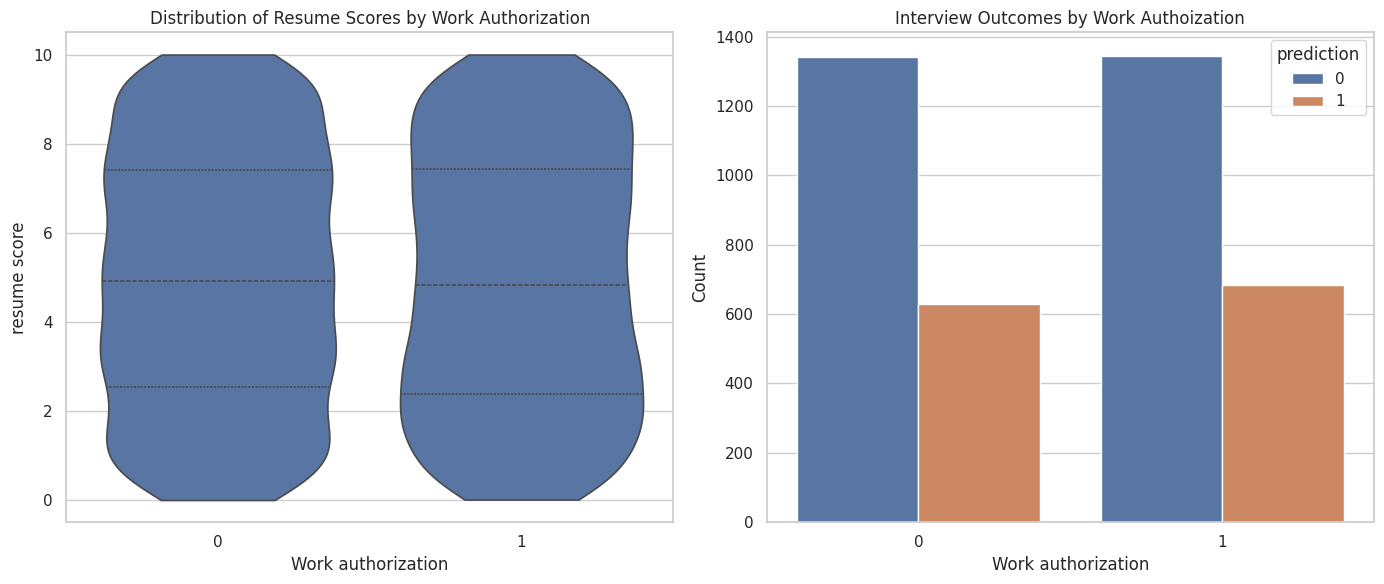

In [ ]:
# 1. Selection rates for interviews by work authorization
selection_rate_auth = resume_2_scored_evaluated.groupby('Work authorization')['prediction'].mean()
print("Selection Rates by work authorization:")
print(selection_rate_auth)

# 2. Distribution graphs
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_2_scored_evaluated, x='Work authorization', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Work Authorization')
ax[0].set_xlabel('Work authorization')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_2_scored_evaluated, x='Work authorization', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Work Authoization')
ax[1].set_xlabel('Work authorization')
ax[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
resume_2_scored_evaluated['auth_cat'] = resume_2_scored_evaluated['Work authorization'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(auth_cat)'
model = smf.logit(formula=formula, data=resume_2_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.633023
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0004220
Time:                        14:24:53   Log-Likelihood:                -2532.1
converged:                       True   LL-Null:                       -2533.2
Covariance Type:            nonrobust   LLR p-value:                    0.5443
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.7289      0.096     -7.575      0.000      -0.918      -0.540
C(auth_cat)[T.1]                      -0.0095      0.134     -0.071      0.943      -0.272       0.253
Q("Resume score")                     -0.0052      0.017     -0.310      0.757      -0.038       0.028
Q("Resume score"):C(auth_cat)[T.1]     0.0181      0.023      0.775      0.438      -0.028       0.064
======================================================================================================
"""

###Disability

Selection Rates by disability:
Disability
0      0.325153
1      0.342791
N/A    0.318966
Name: prediction, dtype: float64


<ipython-input-52-8714522774eb>:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_2_scored_evaluated, x='Disability', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


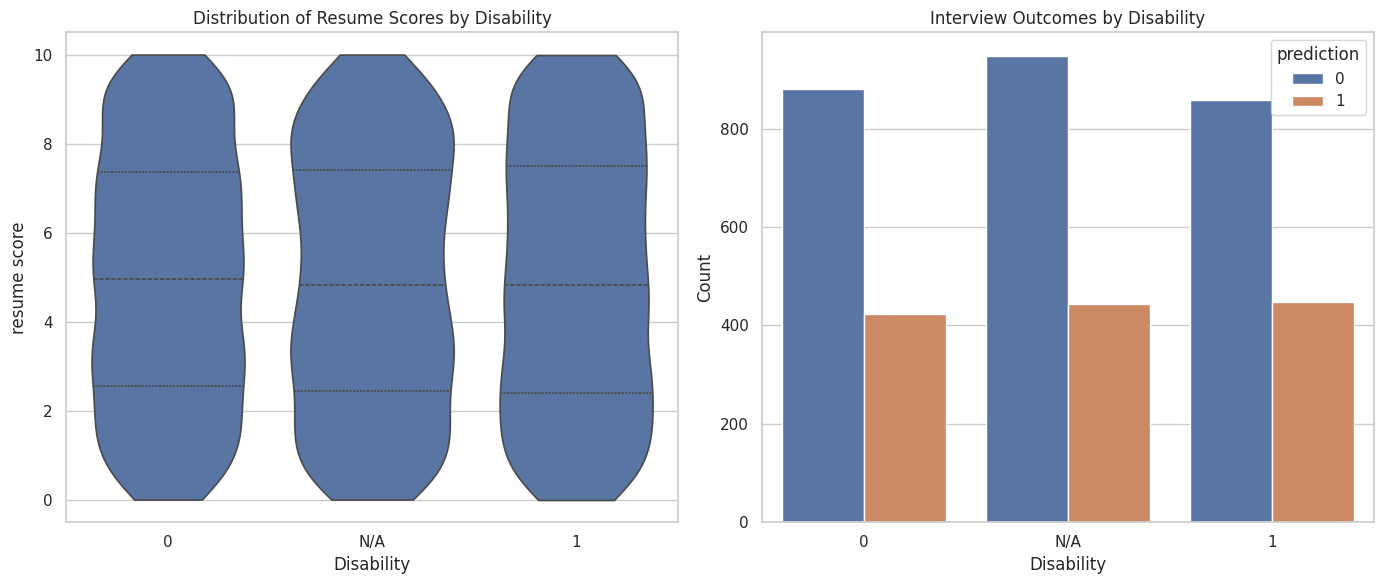

In [ ]:
# 1. Selection rates for interviews by disability status
selection_rate_dis = resume_2_scored_evaluated.groupby('Disability')['prediction'].mean()
print("Selection Rates by disability:")
print(selection_rate_dis)

# 2. distribution graphs
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Resume Scores by Gender
sns.violinplot(data=resume_2_scored_evaluated, x='Disability', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Disability')
ax[0].set_xlabel('Disability')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_2_scored_evaluated, x='Disability', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Disability')
ax[1].set_xlabel('Disability')
ax[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
resume_2_scored_evaluated['disability_cat'] = resume_2_scored_evaluated['Disability'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(disability_cat)'

model = smf.logit(formula=formula, data=resume_2_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.632774
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0008150
Time:                        14:25:13   Log-Likelihood:                -2531.1
converged:                       True   LL-Null:                       -2533.2
Covariance Type:            nonrobust   LLR p-value:                    0.5310
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.6592      0.118     -5.574      0.000      -0.891      -0.427
C(disability_cat)[T.1]                         0.0172      0.165      0.105      0.917      -0.305       0.340
C(disability_cat)[T.N/A]                      -0.2323      0.165     -1.407      0.160      -0.556       0.091
Q("Resume score")                             -0.0143      0.021     -0.690      0.490      -0.055       0.026
Q("Resume score"):C(disability_cat)[T.1]       0.0125      0.029      0.435      0.664      -0.044       0.069
Q("Resume score"):C(disability_cat)[T.N/A]     0.0412      0.029      1.429      0.153      -0.015       0.098
==============================================================================================================
"""

### Veteran Status

Selection Rates by veteran status:
Veteran status
0      0.321856
1      0.318216
N/A    0.346475
Name: prediction, dtype: float64


<ipython-input-55-e8432a2da134>:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_2_scored_evaluated, x='Veteran status', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


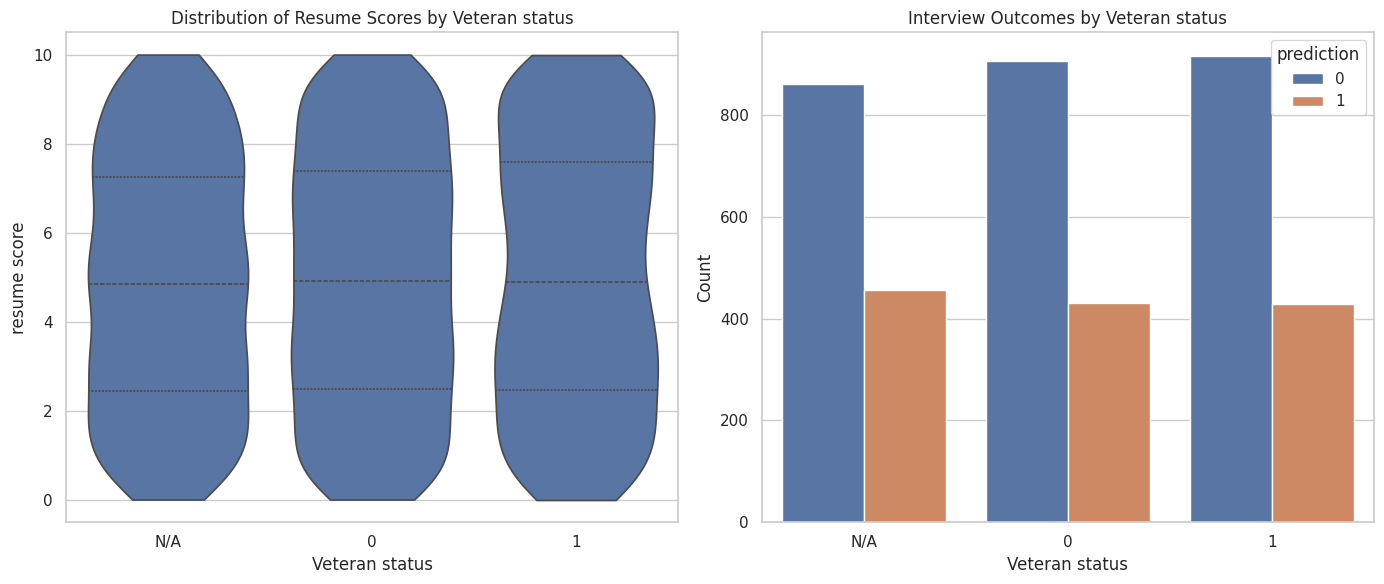

In [ ]:
# 1. Selection rates for interviews by disability status
selection_rate_vet = resume_2_scored_evaluated.groupby('Veteran status')['prediction'].mean()
print("Selection Rates by veteran status:")
print(selection_rate_vet)

# 2. distribution graphs
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.violinplot(data=resume_2_scored_evaluated, x='Veteran status', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Veteran status')
ax[0].set_xlabel('Veteran status')
ax[0].set_ylabel('resume score')

# Bar Plot of Interview Outcomes by Gender
sns.countplot(data=resume_2_scored_evaluated, x='Veteran status', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Veteran status')
ax[1].set_xlabel('Veteran status')
ax[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
resume_2_scored_evaluated['veteran_cat'] = resume_2_scored_evaluated['Veteran status'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(veteran_cat)'
model = smf.logit(formula=formula, data=resume_2_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.632880
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0006477
Time:                        14:25:29   Log-Likelihood:                -2531.5
converged:                       True   LL-Null:                       -2533.2
Covariance Type:            nonrobust   LLR p-value:                    0.6567
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -0.7293      0.116     -6.285      0.000      -0.957      -0.502
C(veteran_cat)[T.1]                        -0.0527      0.164     -0.322      0.748      -0.374       0.268
C(veteran_cat)[T.N/A]                       0.0322      0.164      0.196      0.845      -0.290       0.354
Q("Resume score")                          -0.0032      0.020     -0.159      0.873      -0.043       0.037
Q("Resume score"):C(veteran_cat)[T.1]       0.0072      0.028      0.254      0.799      -0.048       0.063
Q("Resume score"):C(veteran_cat)[T.N/A]     0.0160      0.029      0.554      0.579      -0.041       0.073
===========================================================================================================
"""

### Exploring the effect of degree, GPA, and the length of experiences

#### Degree

Selection Rates by veteran status:
Degree
Bachelors    0.328272
Masters      0.330997
Phd          0.327082
Name: prediction, dtype: float64


<ipython-input-64-4dd3af1667ac>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resume_2_scored_evaluated, x='Degree', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


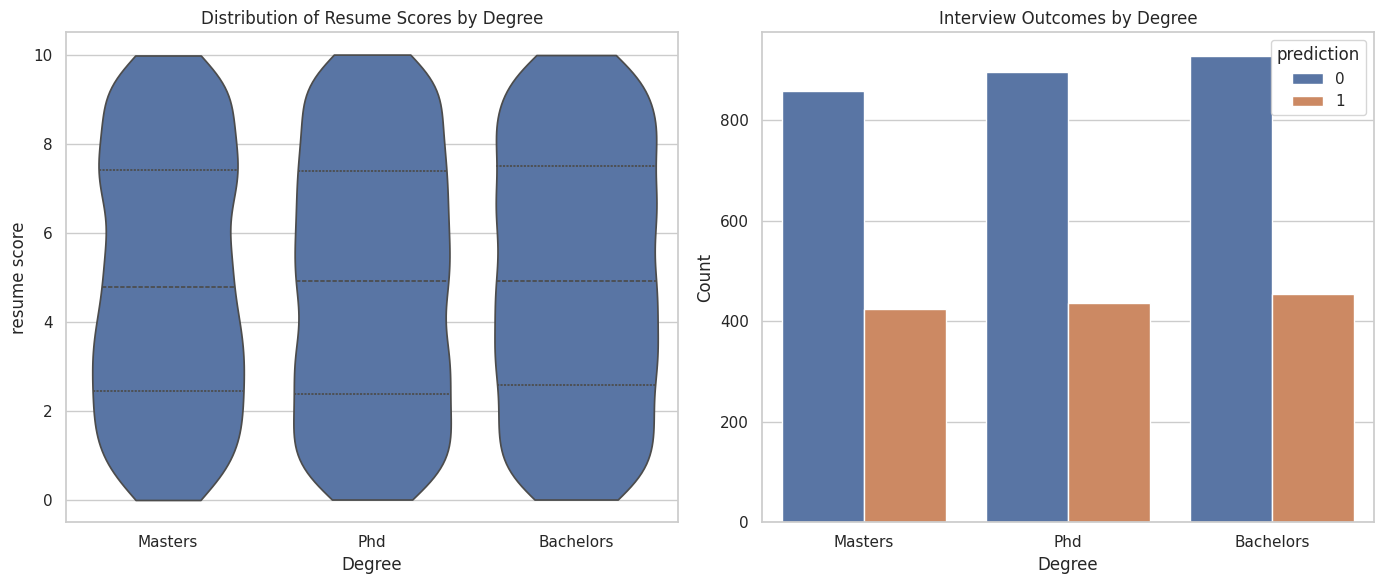

In [ ]:
# 1. Selection rates for interviews by degrees
selection_rate_deg = resume_2_scored_evaluated.groupby('Degree')['prediction'].mean()
print("Selection Rates by veteran status:")
print(selection_rate_deg)

# 2. distribution graphs
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(data=resume_2_scored_evaluated, x='Degree', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Degree')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('resume score')

sns.countplot(data=resume_2_scored_evaluated, x='Degree', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Degree')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Linear regression to explore the relationship between degree and resume score
resume_scored_evaluated['Degree'] = resume_scored_evaluated['Degree'].astype('category')
model_linear = smf.ols('Q("Resume score") ~ C(Degree)', data=resume_scored_evaluated).fit()
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Resume score")   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8411
Date:                Wed, 08 May 2024   Prob (F-statistic):              0.431
Time:                        14:35:21   Log-Likelihood:                -9943.0
No. Observations:                4000   AIC:                         1.989e+04
Df Residuals:                    3997   BIC:                         1.991e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.9642 

In [ ]:
# Logistic regression to explore the relationship between degree and final prediction
formula = 'prediction ~ C(Degree)'

model = smf.logit(formula=formula, data=resume_2_scored_evaluated).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.633284
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3997
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 May 2024   Pseudo R-squ.:               9.395e-06
Time:                        14:38:30   Log-Likelihood:                -2533.1
converged:                       True   LL-Null:                       -2533.2
Covariance Type:            nonrobust   LLR p-value:                    0.9765
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7160      0.057    -12.504      0.000      -0.828      -0.604
C(Degree)[T.Masters]     0.0123      0.082      0.150      0.881      -0.149       0.174
C(Degree)[T.Phd]        -0.0054      0.082     -0.066      0.947      -0.166       0.155
========================================================================================
"""

#### GPA

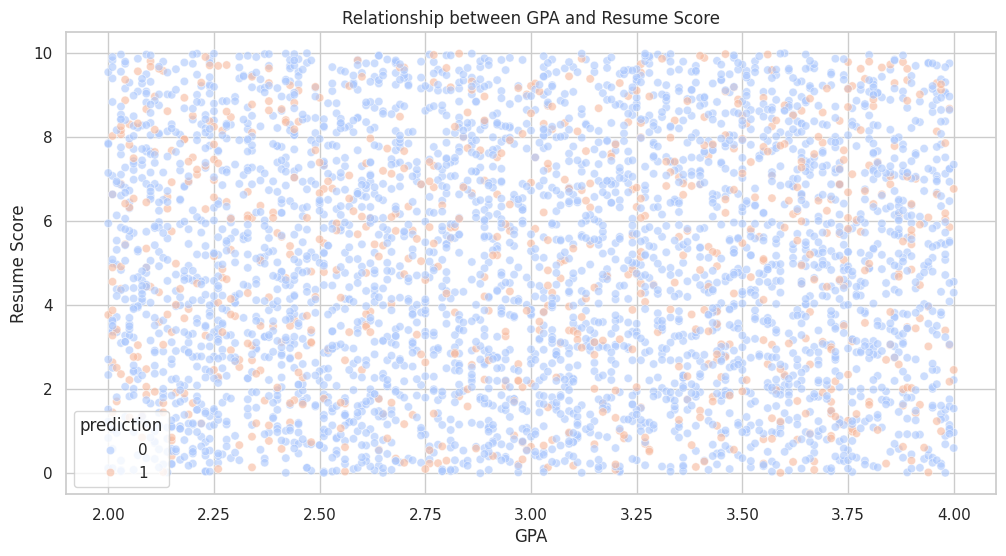

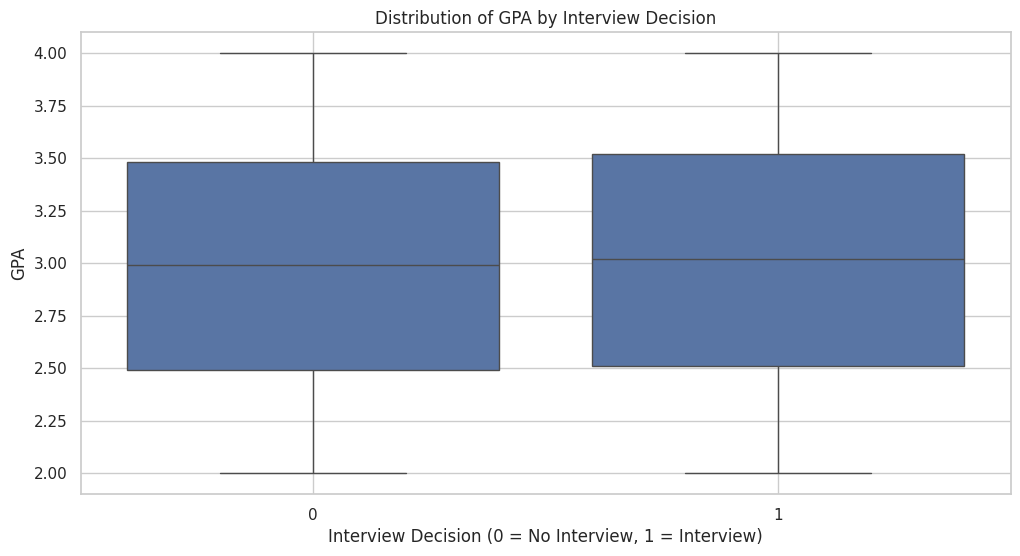

In [ ]:
# Visualize the relationship between GPA and resume score
plt.figure(figsize=(12, 6))
sns.scatterplot(x=resume_2_scored_evaluated['GPA'], y=resume_2_scored_evaluated['Resume score'], hue=resume_scored_evaluated['prediction'], palette='coolwarm', alpha=0.6)
plt.title('Relationship between GPA and Resume Score')
plt.xlabel('GPA')
plt.ylabel('Resume Score')
plt.grid(True)

# Visualize the relationship between GPA and Final Prediction
plt.figure(figsize=(12, 6))
sns.boxplot(x=resume_2_scored_evaluated['prediction'], y=resume_2_scored_evaluated['GPA'])
plt.title('Distribution of GPA by Interview Decision')
plt.xlabel('Interview Decision (0 = No Interview, 1 = Interview)')
plt.ylabel('GPA')
plt.grid(True)

plt.show()

In [ ]:
# 3. Linear regression to explore the relationship between GPA and resume score
# resume_scored_evaluated['Degree'] = resume_scored_evaluated['Degree'].astype('category')
model_linear = smf.ols('Q("Resume score") ~ GPA', data=resume_2_scored_evaluated).fit()
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:      Q("Resume score")   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9246
Date:                Wed, 08 May 2024   Prob (F-statistic):              0.336
Time:                        15:20:02   Log-Likelihood:                -9912.5
No. Observations:                4000   AIC:                         1.983e+04
Df Residuals:                    3998   BIC:                         1.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7171      0.241     19.610      0.0

In [ ]:
# Logistic regression
model_logistic = smf.logit('prediction ~ GPA', data=resume_2_scored_evaluated).fit()
print(model_logistic.summary())


Optimization terminated successfully.
         Current function value: 0.633170
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 May 2024   Pseudo R-squ.:               0.0001888
Time:                        15:20:13   Log-Likelihood:                -2532.7
converged:                       True   LL-Null:                       -2533.2
Covariance Type:            nonrobust   LLR p-value:                    0.3281
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8845      0.178     -4.971      0.000      -1.233      -0.536
GPA            0.0569      0.

#### Length of experience

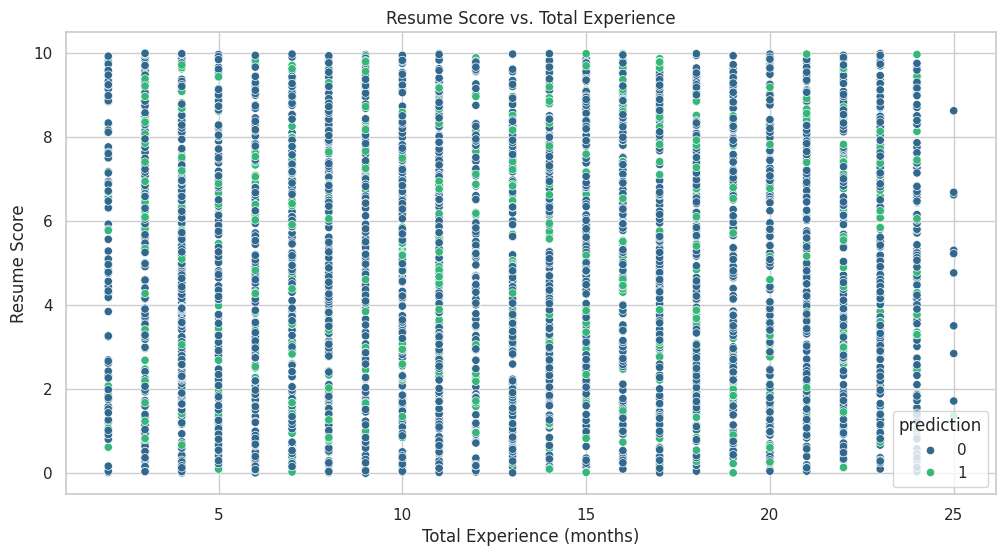

In [ ]:
from datetime import datetime

def calculate_duration(start_date, end_date):
    start = datetime.strptime(start_date, "%m/%y")
    end = datetime.strptime(str(end_date), "%m/%y")
    duration = (end.year - start.year) * 12 + (end.month - start.month)
    return max(0, duration)  # to avoid negative durations due to data inconsistencies

resume_2_scored_evaluated['Total Experience'] = (resume_2_scored_evaluated.apply(lambda x: calculate_duration(x['Start 1'], x['End 1']), axis=1))

# Visualize the relationship between Total Experience and Resume Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x=resume_2_scored_evaluated['Total Experience'], y=resume_2_scored_evaluated['Resume score'], hue=resume_scored_evaluated['prediction'], palette='viridis')
plt.title('Resume Score vs. Total Experience')
plt.xlabel('Total Experience (months)')
plt.ylabel('Resume Score')
plt.grid(True)

plt.show()

## Test 3: Exploring the effect of types of experiences on the final decision

In [ ]:
resumes_3 = resumes.copy()
roles = {
    0: ["Investment Banker", "Financial Analyst", "Data Analyst", "Business Analyst", "Data Scientist"],
    1: ["Software Engineer", "Researcher", "Machine Learning Engineer", "Product Manager", "Product Designer"],
    2: ["Sales Representative", "Social Media Coordinator", "Public Relations Officer", "Human Resources Specialist"],
    3: ["Pharmacist", "Multimedia Artist", "Dietitian", "Pilot", "Firefighter"],
}

np.random.seed(seed)

def assign_role(row):
    # Randomly select a category
    category = np.random.choice(list(roles.keys()))
    # Randomly select a role from the chosen category
    role = np.random.choice(roles[category])
    return pd.Series([category, role])

resumes_3[['Role Category', 'Role 1']] = resumes_3.apply(assign_role, axis=1)
resumes_3['Role 2'] = 'N/A'
resumes_3['Start 2'] = 'N/A'
resumes_3['End 2'] = 'N/A'
resumes_3['Role 3'] = 'N/A'
resumes_3['Start 3'] = 'N/A'
resumes_3['End 3'] = 'N/A'
resumes_3

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Role Category
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,Human Resources Specialist,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A,2
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,Data Analyst,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A,0
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,Firefighter,12/19,05/21,N/A,N/A,N/A,N/A,N/A,N/A,3
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,Financial Analyst,08/18,08/19,N/A,N/A,N/A,N/A,N/A,N/A,0
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,Public Relations Officer,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,University of Arkansas for Medical Sciences,3.29,Masters,Newark,N/A,0,0,N/A,2,Human Resources Specialist,03/19,02/21,N/A,N/A,N/A,N/A,N/A,N/A,2
3996,3997,Marian College of Fond Du Lac,3.53,Phd,Tulsa,M,1,0,N/A,0,Data Analyst,11/19,10/20,N/A,N/A,N/A,N/A,N/A,N/A,0
3997,3998,Washington Bible College,3.17,Phd,Jersey City,F,N/A,1,N/A,3,Product Manager,05/15,03/17,N/A,N/A,N/A,N/A,N/A,N/A,1
3998,3999,Sam Houston State University,2.53,Bachelors,Reno,N/A,0,0,N/A,4,Software Engineer,07/21,04/22,N/A,N/A,N/A,N/A,N/A,N/A,1


In [ ]:
resumes_3_csv = resumes_3.copy().drop('Role Category', axis=1)
resumes_3_csv

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,Human Resources Specialist,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,Data Analyst,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,Firefighter,12/19,05/21,N/A,N/A,N/A,N/A,N/A,N/A
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,Financial Analyst,08/18,08/19,N/A,N/A,N/A,N/A,N/A,N/A
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,Public Relations Officer,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,University of Arkansas for Medical Sciences,3.29,Masters,Newark,N/A,0,0,N/A,2,Human Resources Specialist,03/19,02/21,N/A,N/A,N/A,N/A,N/A,N/A
3996,3997,Marian College of Fond Du Lac,3.53,Phd,Tulsa,M,1,0,N/A,0,Data Analyst,11/19,10/20,N/A,N/A,N/A,N/A,N/A,N/A
3997,3998,Washington Bible College,3.17,Phd,Jersey City,F,N/A,1,N/A,3,Product Manager,05/15,03/17,N/A,N/A,N/A,N/A,N/A,N/A
3998,3999,Sam Houston State University,2.53,Bachelors,Reno,N/A,0,0,N/A,4,Software Engineer,07/21,04/22,N/A,N/A,N/A,N/A,N/A,N/A


In [ ]:
resumes_3_csv.to_csv(f'3_{n_samples}_resumes.csv', index=False)

In [ ]:
scorer_3 = pd.read_csv(f'/content/3_{n_samples}_scorer.csv')
resumes_3_scored = pd.concat([resumes_3, scorer_3["score"].rename("Resume score")], axis=1)
resumes_3_scored_csv = pd.concat([resumes_3_csv, scorer_3["score"].rename("Resume score")], axis=1)
resumes_3_scored.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Role Category,Resume score
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,...,05/16,04/17,N/A,N/A,N/A,N/A,N/A,N/A,2,0.72
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,...,12/16,03/17,N/A,N/A,N/A,N/A,N/A,N/A,0,1.19
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,...,12/19,05/21,N/A,N/A,N/A,N/A,N/A,N/A,3,5.66
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,...,08/18,08/19,N/A,N/A,N/A,N/A,N/A,N/A,0,3.60
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,...,10/21,01/23,N/A,N/A,N/A,N/A,N/A,N/A,2,2.44


In [ ]:
resumes_3_scored_csv.to_csv(f'3_{n_samples}_resumes_scored.csv', index=False)

In [ ]:
evaluator_3 = pd.read_csv(f'/content/3_{n_samples}_evaluator.csv')
resumes_3_evaluated = pd.concat([resumes_3_scored, evaluator_3["prediction"]], axis=1)
resumes_3_evaluated

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Role Category,Resume score,prediction
0,1,Pacific Lutheran University,2.09,Masters,Oklahoma City,N/A,N/A,1,0,4,...,04/17,N/A,N/A,N/A,N/A,N/A,N/A,2,0.72,0
1,2,Temple University School of Podiatric Medicine,3.24,Phd,Houston,M,0,1,N/A,2,...,03/17,N/A,N/A,N/A,N/A,N/A,N/A,0,1.19,1
2,3,Marywood University,3.12,Bachelors,Honolulu,F,1,1,1,0,...,05/21,N/A,N/A,N/A,N/A,N/A,N/A,3,5.66,1
3,4,Simon's Rock College,2.69,Phd,Columbus,N/A,0,0,1,4,...,08/19,N/A,N/A,N/A,N/A,N/A,N/A,0,3.60,0
4,5,Pacific University,2.63,Bachelors,Charlotte,F,N/A,0,N/A,1,...,01/23,N/A,N/A,N/A,N/A,N/A,N/A,2,2.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,University of Arkansas for Medical Sciences,3.29,Masters,Newark,N/A,0,0,N/A,2,...,02/21,N/A,N/A,N/A,N/A,N/A,N/A,2,6.03,0
3996,3997,Marian College of Fond Du Lac,3.53,Phd,Tulsa,M,1,0,N/A,0,...,10/20,N/A,N/A,N/A,N/A,N/A,N/A,0,6.24,1
3997,3998,Washington Bible College,3.17,Phd,Jersey City,F,N/A,1,N/A,3,...,03/17,N/A,N/A,N/A,N/A,N/A,N/A,1,8.06,0
3998,3999,Sam Houston State University,2.53,Bachelors,Reno,N/A,0,0,N/A,4,...,04/22,N/A,N/A,N/A,N/A,N/A,N/A,1,8.39,0


Selection Rates by role category:
Role Category
0    0.319608
1    0.322811
2    0.348223
3    0.329714
Name: prediction, dtype: float64


<ipython-input-77-701761ff5453>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=resumes_3_evaluated, x='Role Category', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles


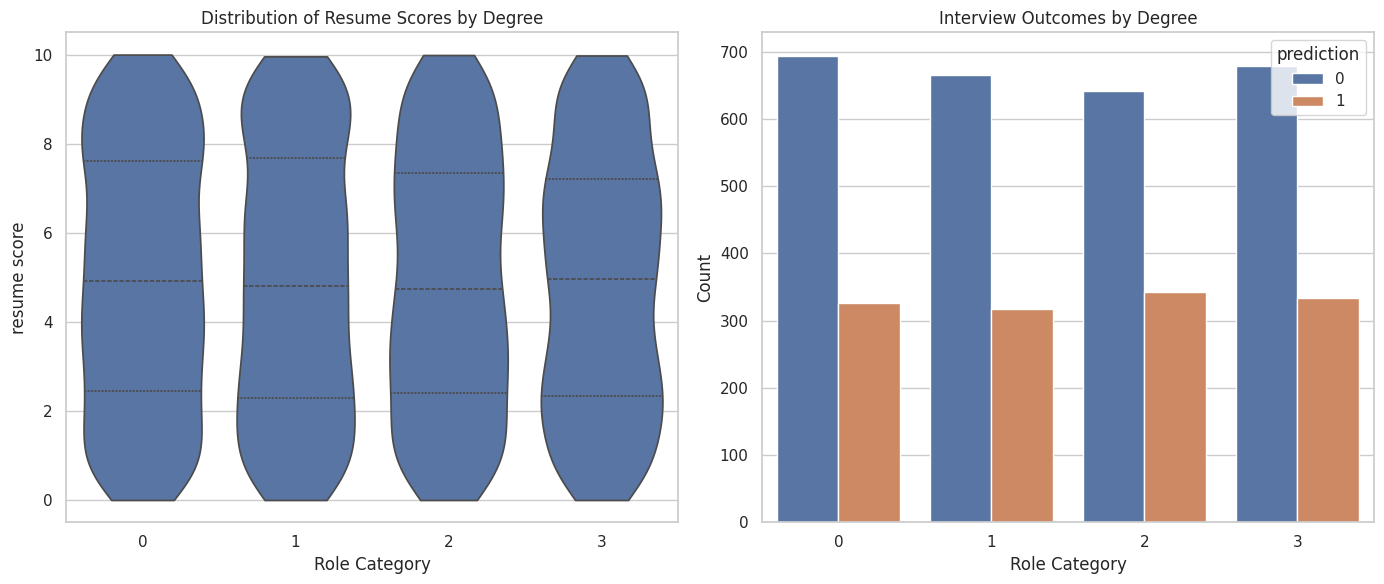

In [ ]:
# 1. Selection rates for interviews by role category
selection_rate_role = resumes_3_evaluated.groupby('Role Category')['prediction'].mean()
print("Selection Rates by role category:")
print(selection_rate_role)

# 2. distribution graphs
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(data=resumes_3_evaluated, x='Role Category', y='Resume score', ax=ax[0], inner='quartile',  # Show the quartiles
                    scale='count', cut=0)
ax[0].set_title('Distribution of Resume Scores by Degree')
ax[0].set_xlabel('Role Category')
ax[0].set_ylabel('resume score')

sns.countplot(data=resumes_3_evaluated, x='Role Category', hue='prediction', ax=ax[1])
ax[1].set_title('Interview Outcomes by Degree')
ax[1].set_xlabel('Role Category')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
resumes_3_evaluated['role_cat'] = resumes_3_evaluated['Role Category'].astype('category')
formula = 'prediction ~ Q("Resume score") * C(role_cat)'

# Fit logistic regression model using the corrected formula
model = smf.logit(formula=formula, data=resumes_3_evaluated).fit()

# Display the results of the corrected model
model.summary()

Optimization terminated successfully.
         Current function value: 0.633393
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             prediction   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 May 2024   Pseudo R-squ.:                0.001239
Time:                        14:48:58   Log-Likelihood:                -2533.6
converged:                       True   LL-Null:                       -2536.7
Covariance Type:            nonrobust   LLR p-value:                    0.5070
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.8271      0.134     -6.177      0.000      -1.089      -0.565
C(role_cat)[T.1]                       0.0926      0.188      0.493      0.622      -0.275       0.460
C(role_cat)[T.2]                       0.0936      0.188      0.497      0.619      -0.276       0.463
C(role_cat)[T.3]                      -0.0779      0.190     -0.409      0.683      -0.451       0.295
Q("Resume score")                      0.0143      0.023      0.620      0.535      -0.031       0.060
Q("Resume score"):C(role_cat)[T.1]    -0.0156      0.033     -0.480      0.631      -0.080       0.048
Q("Resume score"):C(role_cat)[T.2]     0.0075      0.033      0.227      0.820      -0.057       0.072
Q("Resume score"):C(role_cat)[T.3]     0.0252      0.033      0.763      0.445      -0.040       0.090
======================================================================================================
"""